Apply quality control to the dataset and create some scatter plots.

In [38]:
import os
import glob
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [65]:
datadir = "/home/ctroupin/Data/Stareso/CTD"
datafile = os.path.join(datadir, 'Stareso100m_2012_2013_2017.txt')

# Load data

In [66]:
datelist = []
depthlist = []
salinitylist = []
temperaturelist = []

with open(datafile, 'r') as f:
    line = f.readline()
    ncolumns = len(line.split('\t'))
    iline = 0
    line = f.readline()
    while line:
        iline += 1
        linesplit = line.lstrip().split('\t')
        datelist.append(datetime.datetime.strptime(linesplit[3], '%Y-%m-%dT%H:%M:%S'))
        depthlist.append(float(linesplit[4]))
        temperaturelist.append(float(linesplit[6]))
        salinitylist.append(float(linesplit[5]))
        line = f.readline()

Convert to numpy arrays for furthe processing.

In [67]:
T = np.array(temperaturelist)
S = np.array(salinitylist)
depth = np.array(depthlist)

# Quality control

Set ranges for the different variables.

In [70]:
Tmin, Tmax = 10., 30.
Smin, Smax = 35., 40.
dmin, dmax = 0., 100.

## Mask bad values

In [86]:
T_qc = np.ma.masked_outside(T, Tmin, Tmax, copy=True)
np.ma.count_masked(T_qc)
S_qc = np.ma.masked_outside(S, Smin, Smax, copy=True)
np.ma.count_masked(S_qc)
depth_qc = np.ma.masked_outside(depth, dmin, dmax, copy=True)

# Plots

## Histograms

**Goal:** see the distribution of values.<br>
We compare the histogram using the data before and after the quality control.

### Temperature

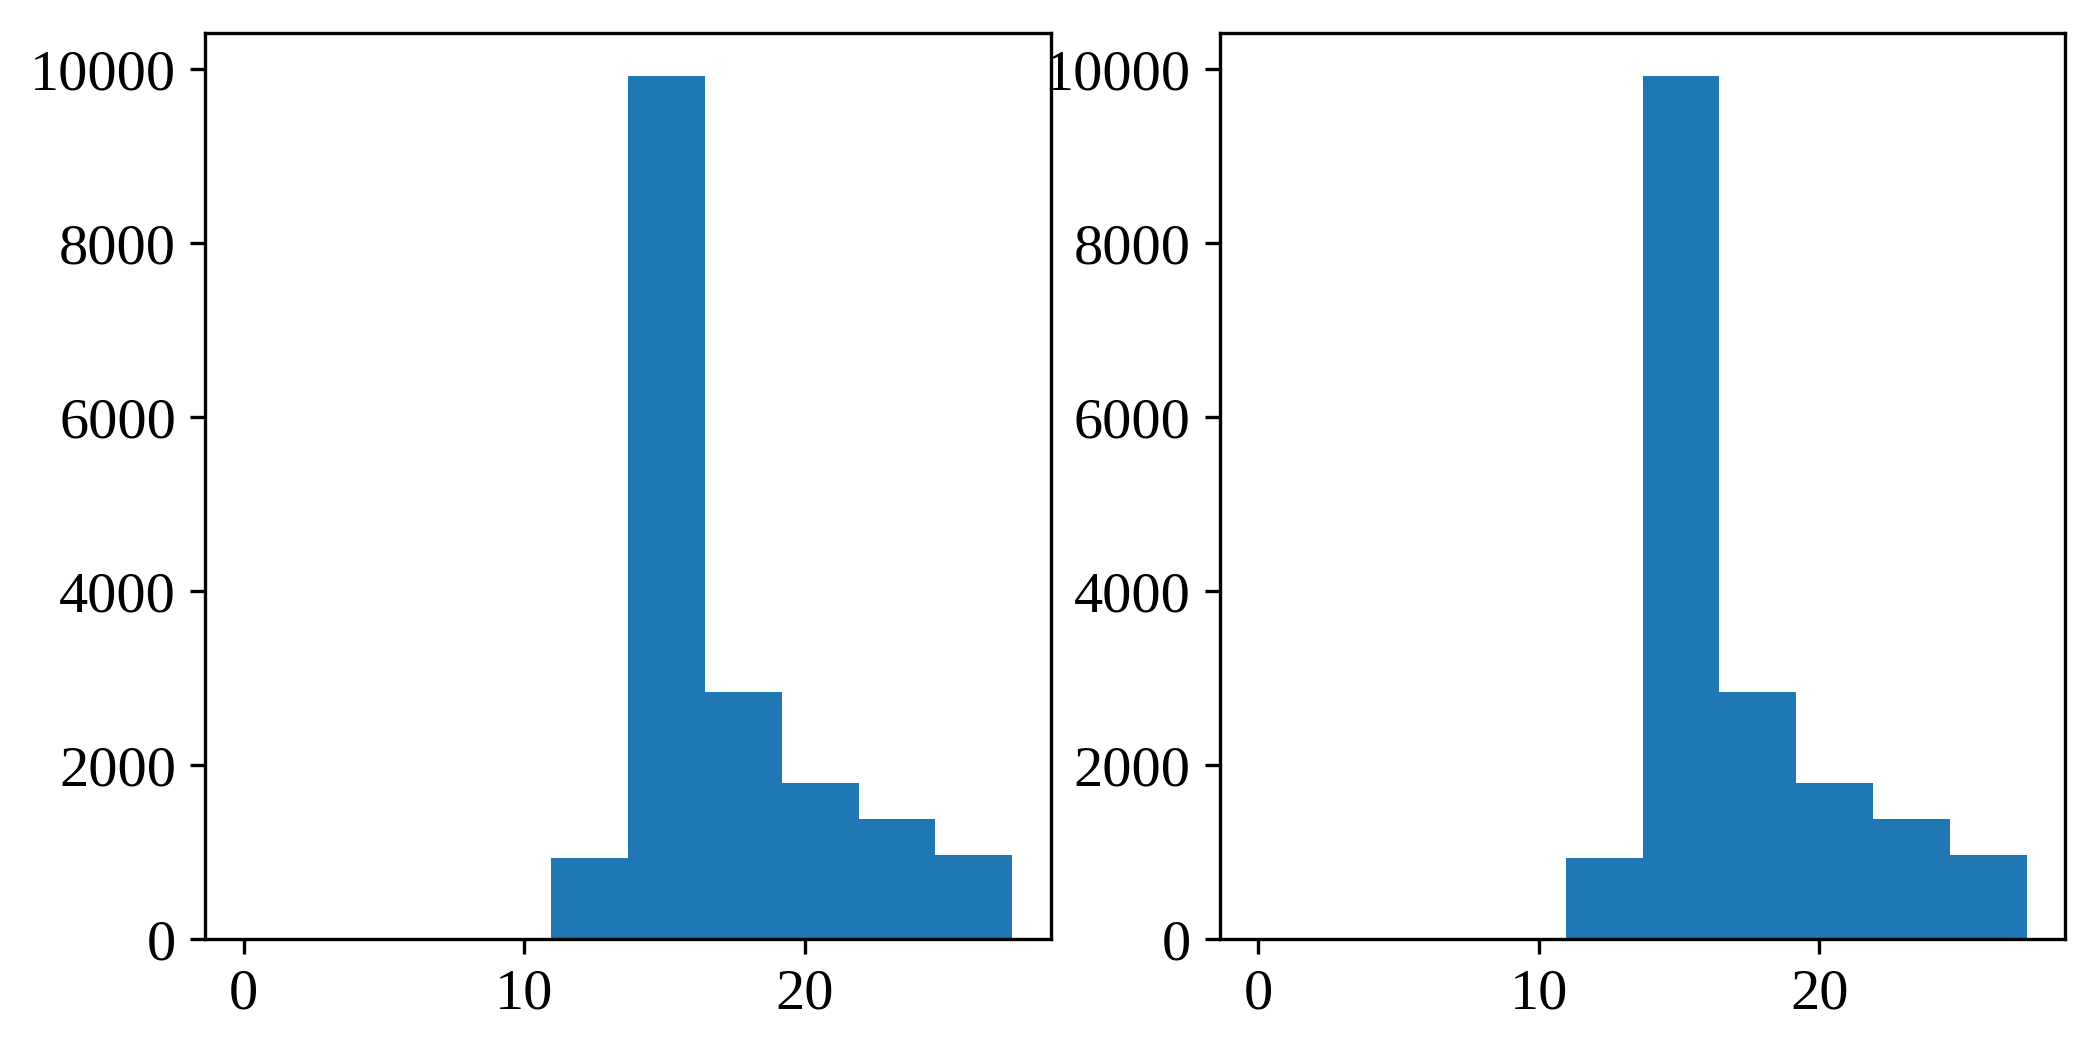

In [81]:
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(121)
plt.hist(T)
ax = plt.subplot(122)
plt.hist(T_qc)
plt.show()

### Salinity

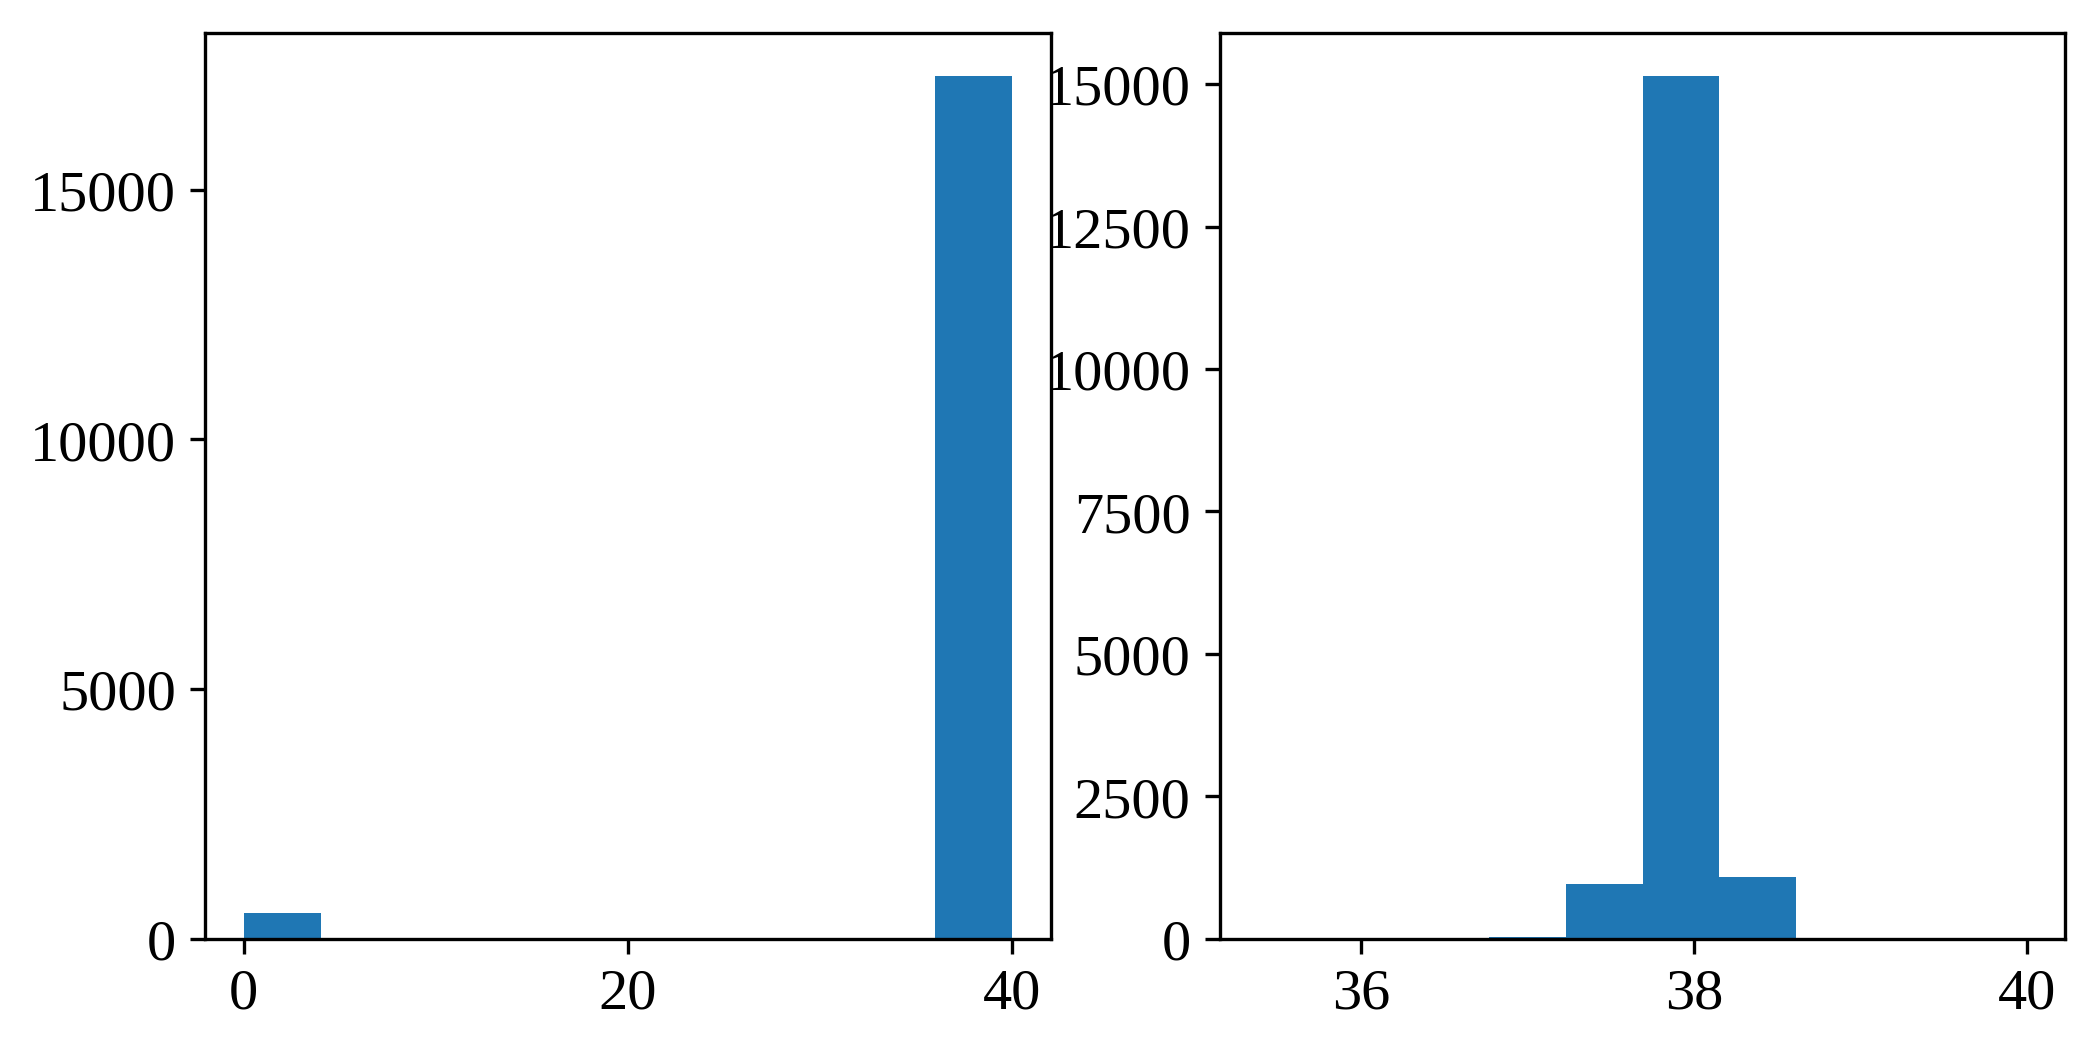

In [83]:
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(121)
plt.hist(S)
ax = plt.subplot(122)
plt.hist(S_qc.compressed())
plt.show()

## Scatter plot

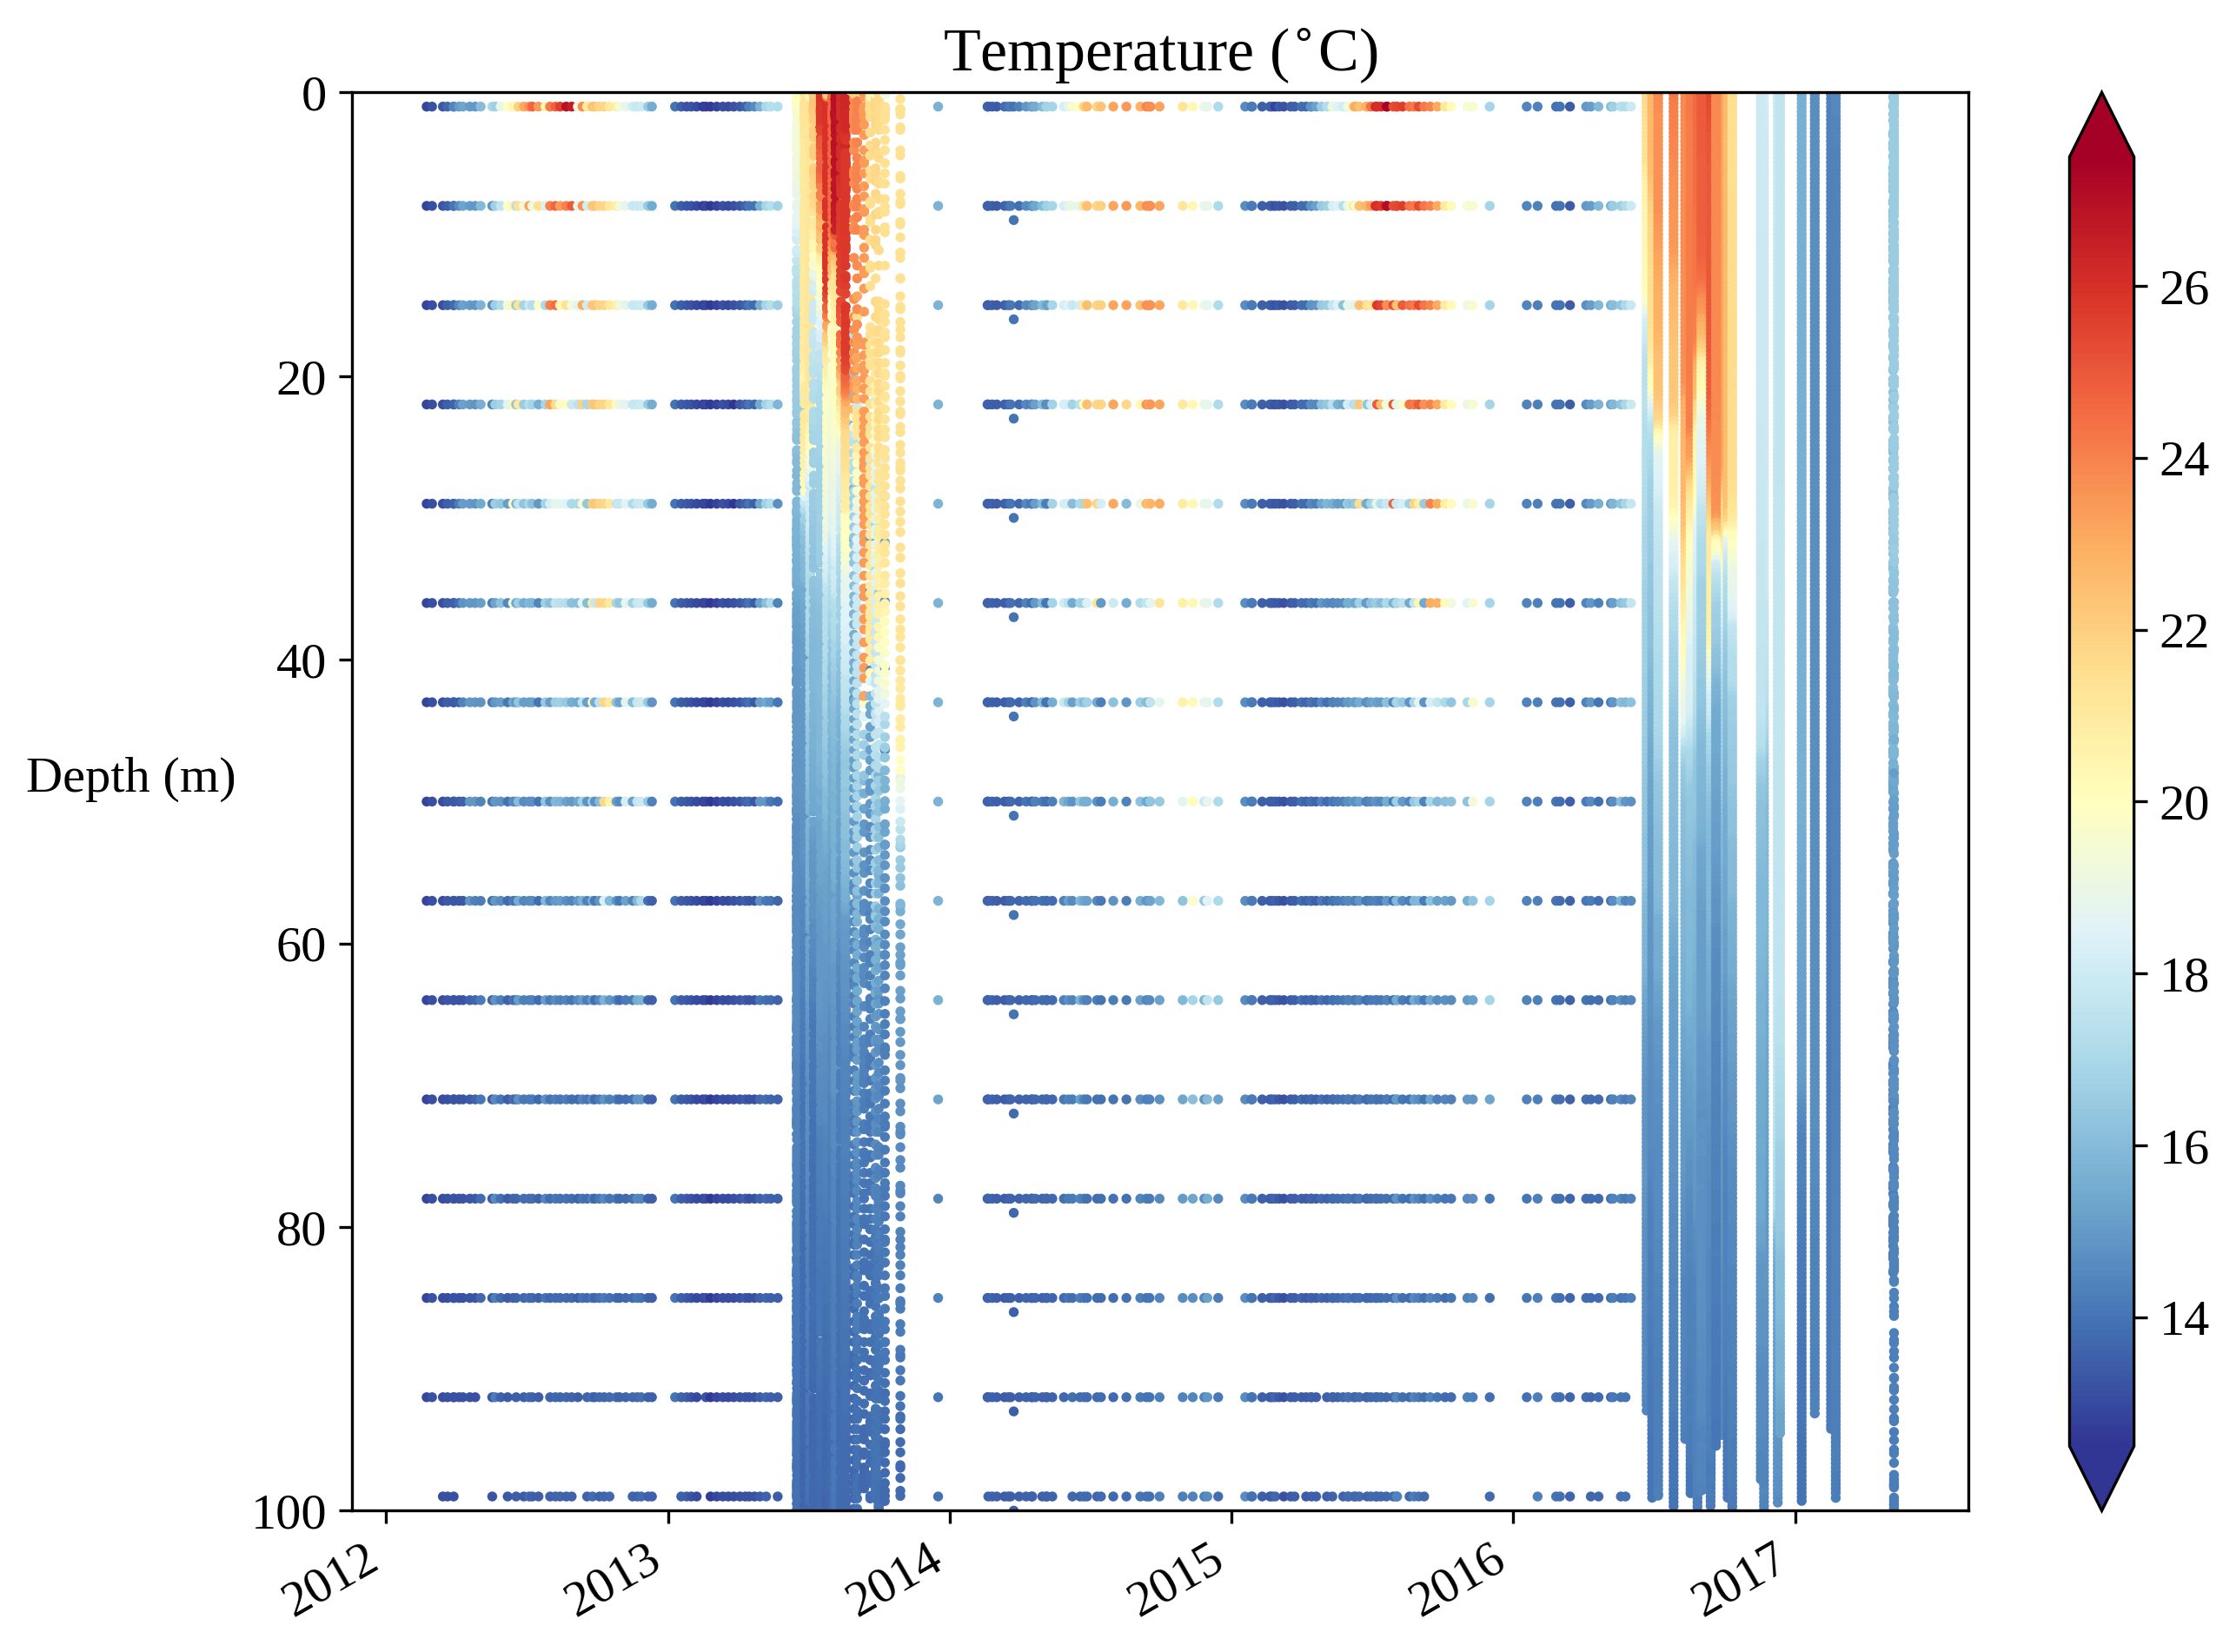

In [87]:
fig = plt.figure()
scat = plt.scatter(datelist, depth_qc, c=T, s=3, cmap=plt.cm.RdYlBu_r,
                  vmin=12.5, vmax=27.5)
plt.gcf().autofmt_xdate()
plt.ylabel("Depth (m)", rotation=0, ha='right')
plt.colorbar(extend='both')
plt.ylim(0, 100)
plt.gca().invert_yaxis()
plt.title("Temperature ($^{\circ}$C)")
plt.show()
plt.close()

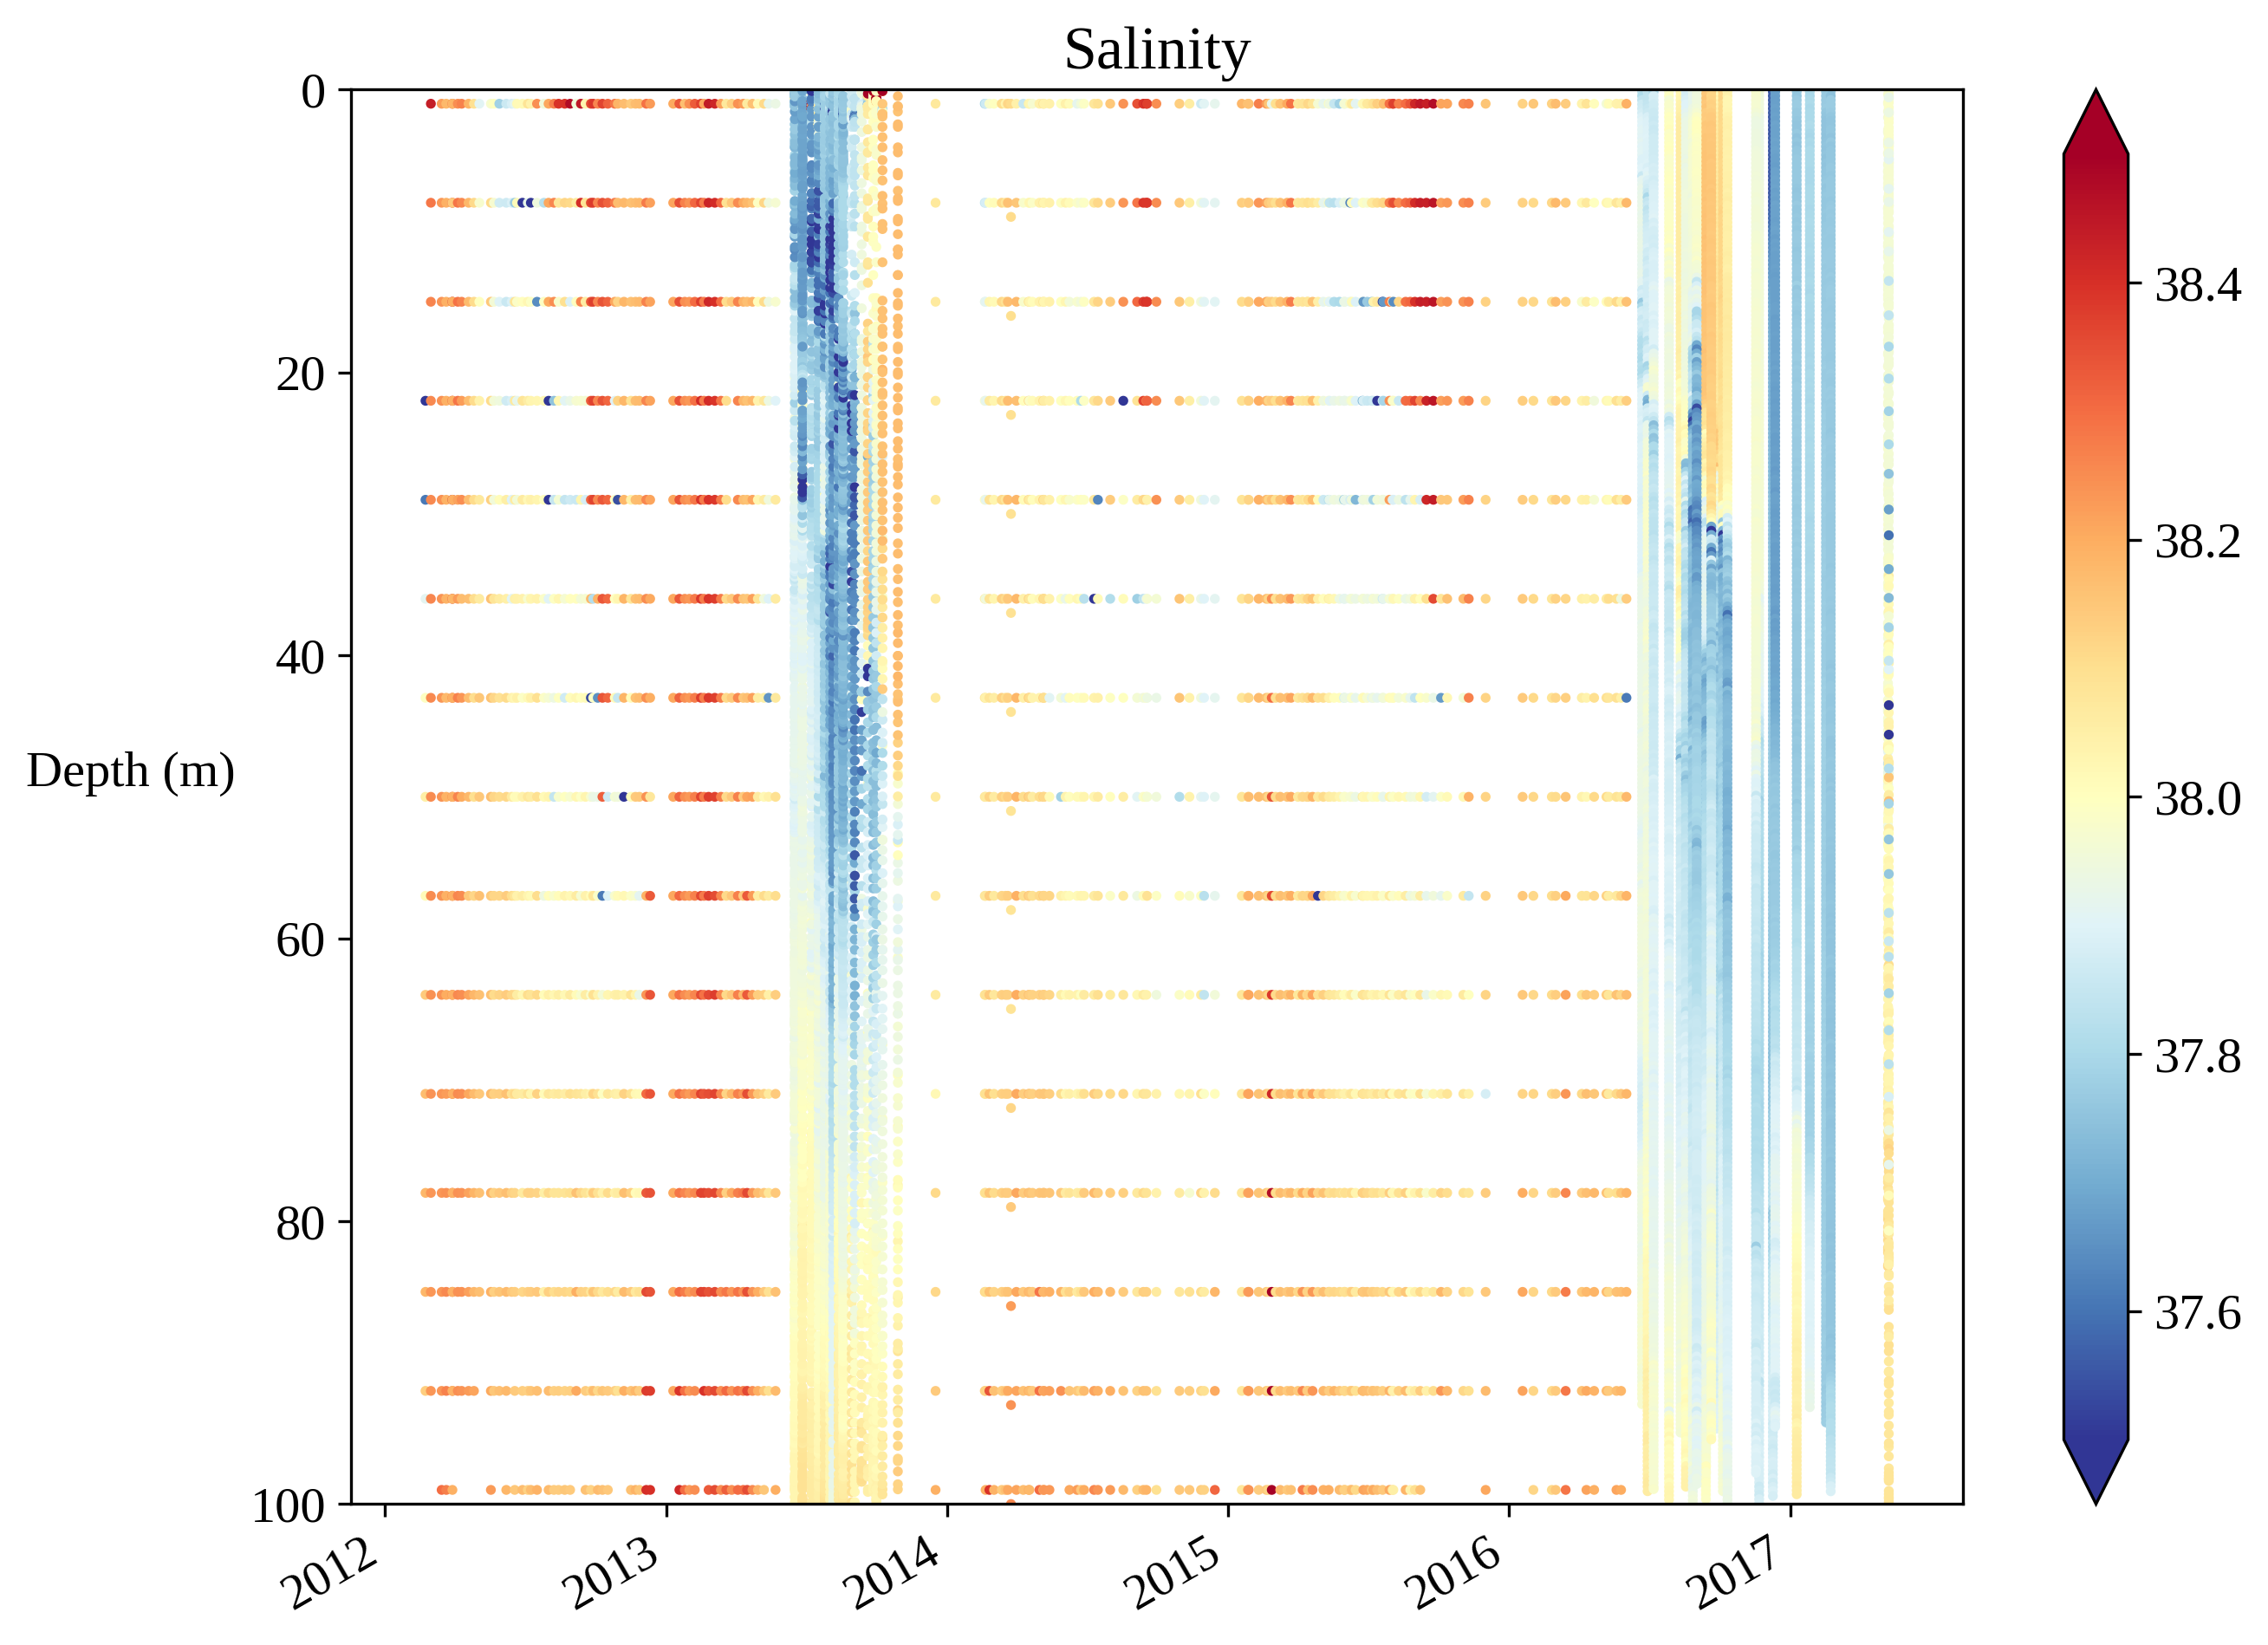

In [89]:
fig = plt.figure()
scat = plt.scatter(datelist, depth_qc, c=S_qc, s=3, cmap=plt.cm.RdYlBu_r,
                  vmin=37.5, vmax=38.5)
plt.gcf().autofmt_xdate()
plt.ylabel("Depth (m)", rotation=0, ha='right')
plt.colorbar(extend='both')
plt.ylim(0, 100)
plt.gca().invert_yaxis()
plt.title("Salinity")
plt.show()
plt.close()

# Create files for divaND

**Next step:** write the data in a format that will be easy to ingest by `divand`.